<a href="https://colab.research.google.com/github/ananya7rai/Stock-Predictor/blob/main/StockPredictorLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
from numpy import array
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [4]:
import math
from sklearn.metrics import mean_squared_error

In [7]:
tickerSymbol = 'AAPL'

In [8]:
tickerData = yf.Ticker(tickerSymbol)

In [9]:
tickerDf = tickerData.history(period = '1d', start = '2016-01-01', end = '2024-01-01')
print(tickerDf.tail())

                                 Open        High         Low       Close  \
Date                                                                        
2023-12-22 00:00:00-05:00  194.667221  194.896627  192.463035  193.091385   
2023-12-26 00:00:00-05:00  193.101342  193.380606  192.323393  192.542816   
2023-12-27 00:00:00-05:00  191.984293  192.991634  190.587962  192.642548   
2023-12-28 00:00:00-05:00  193.629953  194.148591  192.662500  193.071426   
2023-12-29 00:00:00-05:00  193.390581  193.889267  191.226284  192.024185   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-12-22 00:00:00-05:00  37122800        0.0           0.0  
2023-12-26 00:00:00-05:00  28919300        0.0           0.0  
2023-12-27 00:00:00-05:00  48087700        0.0           0.0  
2023-12-28 00:00:00-05:00  34049900        0.0           0.0  
2023-12-29 00:00:00-05:00  42628800        0.0           0.0  


In [10]:
td1 = tickerDf.reset_index()['Close']

In [11]:
td1

0        23.914480
1        23.315201
2        22.858925
3        21.894176
4        22.009947
           ...    
2007    193.091385
2008    192.542816
2009    192.642548
2010    193.071426
2011    192.024185
Name: Close, Length: 2012, dtype: float64

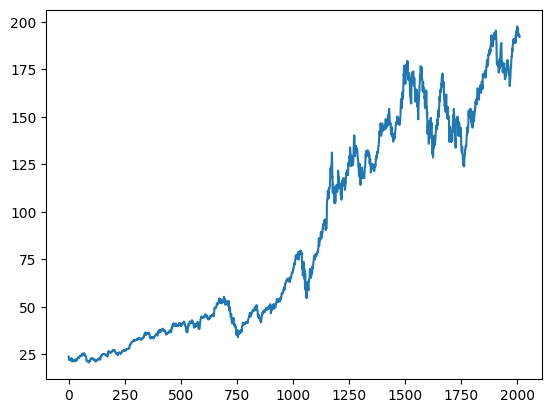

In [12]:
plt.plot(td1)

In [13]:
scaler = MinMaxScaler(feature_range = (0,1))
td1 = scaler.fit_transform(np.array(td1).reshape(-1,1))

In [14]:
print(td1)

[[0.01792783]
 [0.01453911]
 [0.01195903]
 ...
 [0.97202657]
 [0.97445173]
 [0.96852994]]


In [15]:
train_size = int(len(td1)*0.65)
test_size = len(td1) - train_size
train_data, test_data = td1[0 : train_size, :1], td1[train_size : len(td1), :1]

In [16]:
train_size, test_size

(1307, 705)

In [17]:
train_data

array([[0.01792783],
       [0.01453911],
       [0.01195903],
       ...,
       [0.54861313],
       [0.55960258],
       [0.55444069]])

In [18]:
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step -1):
    a = dataset[i : (i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape), print(X_test.shape), print(y_test.shape)


(1206, 100)
(1206,)
(604, 100)
(604,)


(None, None, None, None)

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)


In [22]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
19/19 [==============================] - 12s 336ms/step - loss: 0.0147 - val_loss: 0.0069
Epoch 2/100
19/19 [==============================] - 4s 199ms/step - loss: 0.0013 - val_loss: 0.0072
Epoch 3/100
19/19 [==============================] - 4s 196ms/step - loss: 6.2830e-04 - val_loss: 0.0019
Epoch 4/100
19/19 [==============================] - 5s 262ms/step - loss: 4.3920e-04 - val_loss: 0.0026
Epoch 5/100
19/19 [==============================] - 4s 188ms/step - loss: 4.4887e-04 - val_loss: 0.0028
Epoch 6/100
19/19 [==============================] - 4s 191ms/step - loss: 4.0254e-04 - val_loss: 0.0020
Epoch 7/100
19/19 [==============================] - 5s 294ms/step - loss: 4.1003e-04 - val_loss: 0.0039
Epoch 8/100
19/19 [==============================] - 4s 190ms/step - loss: 3.9741e-04 - val_loss: 0.0025
Epoch 9/100
19/19 [==============================] - 4s 189ms/step - loss: 4.0702e-04 - val_loss: 0.0044
Epoch 10/100
19/19 [==============================] - 5s 254ms

In [25]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

19/19 [==============================] - 1s 40ms/step


In [26]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [27]:
math.sqrt(mean_squared_error(y_test, test_predict))

152.78760744906566

In [28]:
math.sqrt(mean_squared_error(y_test, test_predict))


152.78760744906566

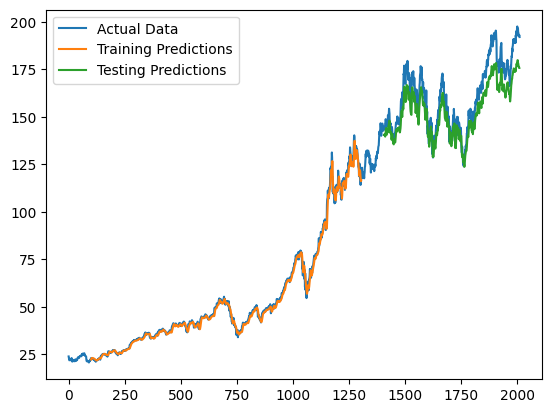

In [29]:
look_back = 100
train_predict_plot = np.empty_like(td1)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back : len(train_predict) + look_back, :] = train_predict

test_predict_plot = np.empty_like(td1)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(td1) - 1, :] = test_predict

plt.plot(scaler.inverse_transform(td1), label='Actual Data')
plt.plot(train_predict_plot, label='Training Predictions')
plt.plot(test_predict_plot, label='Testing Predictions')

plt.legend()
plt.show()

In [30]:
len(test_data)

705

In [31]:
x_input = test_data[605 : ].reshape(1, -1)
x_input.shape

(1, 100)

In [32]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [33]:
temp_input

[0.8849795389724493,
 0.8837421521283688,
 0.8840800369956319,
 0.8934861960366627,
 0.8821650684705973,
 0.8772086184412162,
 0.862733323559608,
 0.8654932631022898,
 0.8730968805799928,
 0.8809258696800888,
 0.9028358396057687,
 0.8761383620843393,
 0.8886986021577499,
 0.8975978476147228,
 0.9197329303133059,
 0.9396152459027549,
 0.9408544446932634,
 0.9498100330558348,
 0.9511617450912133,
 0.9129178546644887,
 0.8827846678658515,
 0.8862766337654944,
 0.8929228532638434,
 0.8756878776890431,
 0.8639161794445183,
 0.8725337103735,
 0.8684219725122766,
 0.8850938641637474,
 0.8912895129836369,
 0.87112556914936,
 0.8623390957867467,
 0.8671828600049312,
 0.8744486788985346,
 0.8512432535599113,
 0.8426257226309293,
 0.8440902067606677,
 0.8470190887369808,
 0.8613252686186312,
 0.853721564857765,
 0.8608184413177367,
 0.8678588885889471,
 0.8823904400929903,
 0.8908389423051775,
 0.8874594896504047,
 0.895401078278534,
 0.9005266433078729,
 0.8900503141931284,
 0.8893182015530041,


In [34]:
lst_output=[]
n_steps=100
i=0
while(i < 90):

    if(len(temp_input)>100):
        # print("temp_input:", temp_input)
        x_input=np.array(temp_input[1:])

        print("{} day input {}".format(i,x_input))

        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print("x_input:", x_input)

        yhat = model.predict(x_input, verbose=0)

        print("{} day output {}".format(i,yhat))

        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        # print("temp_input:", temp_input)

        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1


print(lst_output)

[0.8779565]
101
1 day input [0.88374215 0.88408004 0.8934862  0.88216507 0.87720862 0.86273332
 0.86549326 0.87309688 0.88092587 0.90283584 0.87613836 0.8886986
 0.89759785 0.91973293 0.93961525 0.94085444 0.94981003 0.95116175
 0.91291785 0.88278467 0.88627663 0.89292285 0.87568788 0.86391618
 0.87253371 0.86842197 0.88509386 0.89128951 0.87112557 0.8623391
 0.86718286 0.87444868 0.85124325 0.84262572 0.84409021 0.84701909
 0.86132527 0.85372156 0.86081844 0.86785889 0.88239044 0.89083894
 0.88745949 0.89540108 0.90052664 0.89005031 0.8893182  0.8804753
 0.87309688 0.87095671 0.85642516 0.85710102 0.85957924 0.84639958
 0.82268724 0.83017825 0.84183709 0.84454078 0.86256438 0.88284101
 0.8776591  0.89219074 0.90677855 0.91280517 0.91010166 0.93395792
 0.92493425 0.93982336 0.94303801 0.9526258  0.95251294 0.96243895
 0.95787069 0.96164946 0.95409201 0.9530768  0.95651708 0.95070815
 0.95397924 0.96125463 0.95104647 0.97354938 0.96734562 0.97834327
 0.98646459 0.97219585 0.98082477 0.9

In [35]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 191)

In [36]:
len(td1)

2012

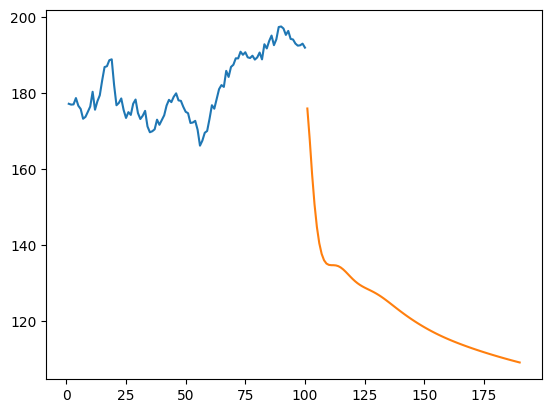

In [37]:
plt.plot(day_new, scaler.inverse_transform(td1[1912:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

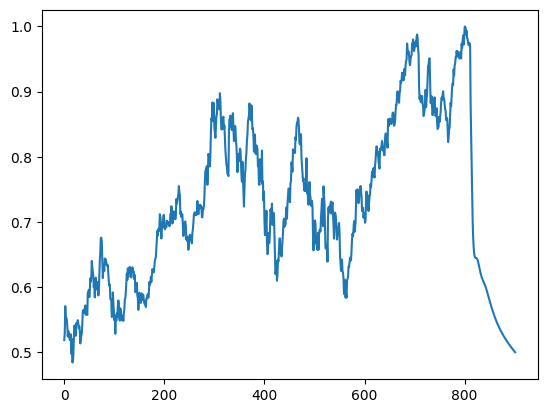

In [38]:
td3 = td1.tolist()
td3.extend(lst_output)
plt.plot(td3[1200:])